<a href="https://colab.research.google.com/github/Isabela0929/Modelado-y-Simulaci-n/blob/main/Modelado_y_simulaci%C3%B3n_ILC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A geometric way of thinking

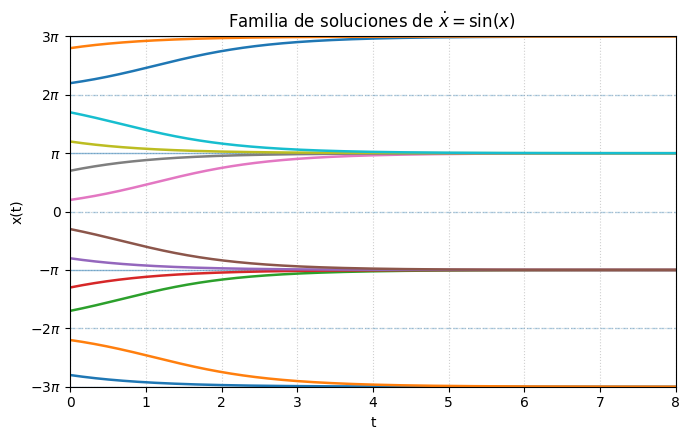

In [ ]:
# Genera la Figura 2.1.3 (Strogatz) con SymPy+mpmath
# Familia de soluciones de x' = sin(x)

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpmath import odefun, mp

# 1) Definir el campo con SymPy y crear versión numérica
t = sp.symbols('t', real=True)
x = sp.symbols('x', real=True)
f = sp.sin(x)                        # f(x) = sin x
f_num = sp.lambdify(x, f, 'mpmath')  # versión numérica

# 2) Rango temporal
t0 = 0.0
tmax = 8.0
N_t = 600
ts = np.linspace(t0, tmax, N_t)

# 3) Condiciones iniciales (evitamos múltiplos exactos de pi)
pis = np.pi
x0_list = [-2.8*pis, -2.2*pis, -1.7*pis, -1.3*pis, -0.8*pis, -0.3*pis,
           0.2*pis, 0.7*pis, 1.2*pis, 1.7*pis, 2.2*pis, 2.8*pis]

# 4) Graficar
plt.figure(figsize=(7,4.5))

# Líneas horizontales en los puntos fijos x = k*pi
kmin, kmax = -4, 4
for k in range(kmin, kmax+1):
    y = k*np.pi
    if k % 2 != 0:  # estables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='solid', alpha=0.5)
    else:           # inestables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='dashed', alpha=0.3)

# Trayectorias
for x0 in x0_list:
    rhs = lambda tt, yy: f_num(yy)
    sol = odefun(rhs, t0, x0)
    xt = [sol(tt) for tt in ts]
    plt.plot(ts, xt, linewidth=1.8)

# Formato
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Familia de soluciones de $\\dot{x} = \\sin(x)$ ")
plt.xlim(t0, tmax)
plt.ylim(-3*np.pi, 3*np.pi)  # <-- límites verticales ajustados
plt.yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.show()



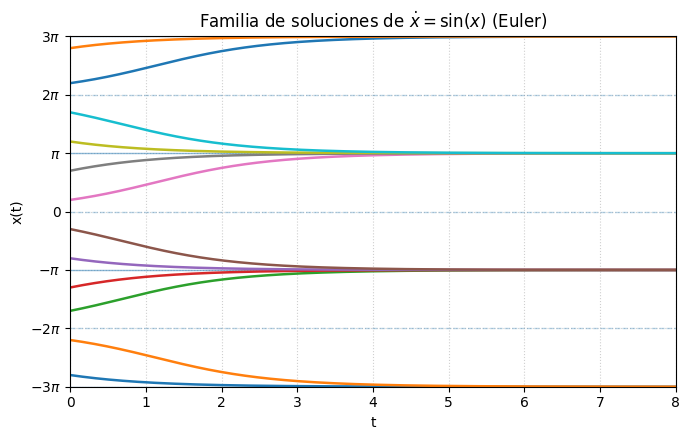

In [ ]:
# 1) Definir función
def f(x, t):
    return np.sin(x)

# 2) Implementación de Euler
def euler(f, x0, t):
    x = np.zeros(len(t))
    x[0] = x0
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * f(x[i-1], t[i-1])
    return x

# 3) Graficar
plt.figure(figsize=(7,4.5))

# Líneas horizontales: puntos fijos
kmin, kmax = -4, 4
for k in range(kmin, kmax+1):
    y = k*np.pi
    if k % 2 != 0:  # estables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='solid', alpha=0.5)
    else:           # inestables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='dashed', alpha=0.3)

# Trayectorias con Euler
for x0 in x0_list:
    xt = euler(f, x0, ts)
    plt.plot(ts, xt, linewidth=1.8)

# Formato de la figura
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Familia de soluciones de $\\dot{x} = \\sin(x)$ (Euler)")
plt.xlim(t0, tmax)
plt.ylim(-3*np.pi, 3*np.pi)
plt.yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.show()

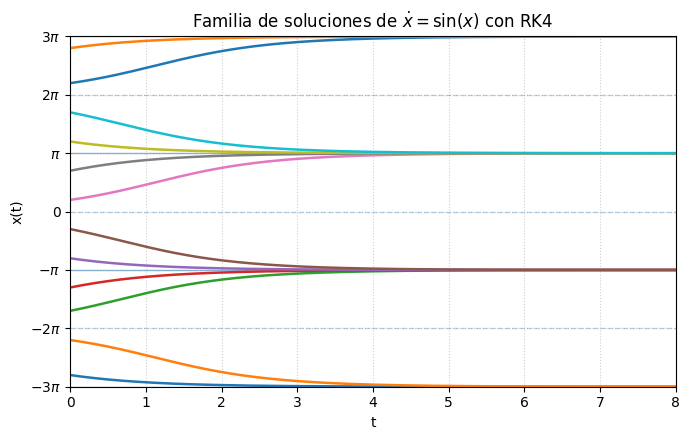

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Definición del sistema
# ===============================
def f(t, x):
    """Ecuación diferencial: dx/dt = sin(x)"""
    return np.sin(x)

# ===============================
# Método de Runge-Kutta 4
# ===============================
def rk4(f, t0, x0, tmax, N):
    """
    Implementación del método de Runge-Kutta de orden 4 (RK4).
    f : función f(t, x)
    t0 : tiempo inicial
    x0 : condición inicial
    tmax : tiempo final
    N : número de pasos
    """
    ts = np.linspace(t0, tmax, N)
    h = ts[1] - ts[0]
    xs = np.zeros(N)
    xs[0] = x0

    for i in range(N-1):
        k1 = h * f(ts[i], xs[i])
        k2 = h * f(ts[i] + h/2, xs[i] + k1/2)
        k3 = h * f(ts[i] + h/2, xs[i] + k2/2)
        k4 = h * f(ts[i] + h, xs[i] + k3)
        xs[i+1] = xs[i] + (k1 + 2*k2 + 2*k3 + k4)/6

    return ts, xs

# ===============================
# Script principal
# ===============================
if __name__ == "__main__":
    # Rango temporal
    t0, tmax, N_t = 0.0, 8.0, 600

    # Condiciones iniciales (evitamos múltiplos exactos de pi)
    pis = np.pi
    x0_list = [-2.8*pis, -2.2*pis, -1.7*pis, -1.3*pis,
               -0.8*pis, -0.3*pis, 0.2*pis, 0.7*pis,
               1.2*pis, 1.7*pis, 2.2*pis, 2.8*pis]

    # Crear figura
    plt.figure(figsize=(7,4.5))

    # Dibujar líneas horizontales en puntos fijos
    kmin, kmax = -4, 4
    for k in range(kmin, kmax+1):
        y = k*np.pi
        if k % 2 != 0:  # estables
            plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='solid', alpha=0.5)
        else:           # inestables
            plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='dashed', alpha=0.3)

    # Simulación para cada condición inicial
    for x0 in x0_list:
        ts, xs = rk4(f, t0, x0, tmax, N_t)
        plt.plot(ts, xs, linewidth=1.8)

    # Formato de la gráfica
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title("Familia de soluciones de $\\dot{x} = \\sin(x)$ con RK4")
    plt.xlim(t0, tmax)
    plt.ylim(-3*np.pi, 3*np.pi)
    plt.yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
               [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
    plt.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)
    plt.tight_layout()
    plt.show()


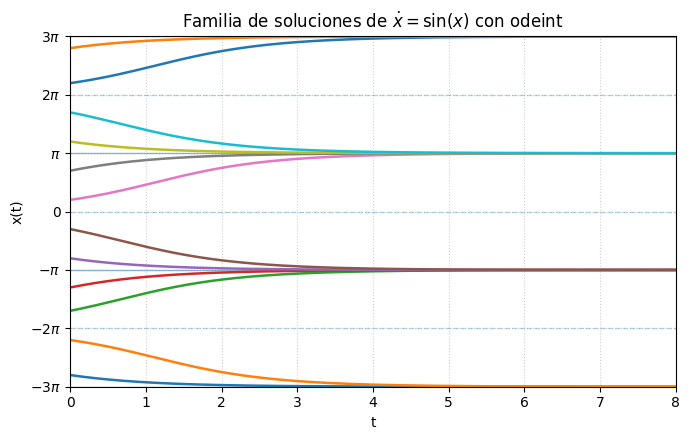

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint

# ============================================================
# Definir la función para resolver con odeint
# ============================================================
def solve_with_odeint(f_sym, t0, tmax, N_t, x0_list):
    """
    Resuelve dx/dt = f(x) con odeint para una lista de condiciones iniciales.
    """
    # Convertir a función numérica (numpy)
    f_num = sp.lambdify(sp.symbols('x'), f_sym, 'numpy')

    # Definir función en forma compatible con odeint
    def rhs(y, t):
        return f_num(y)

    # Tiempo
    ts = np.linspace(t0, tmax, N_t)

    # Resolver para cada condición inicial
    soluciones = []
    for x0 in x0_list:
        sol = odeint(rhs, x0, ts)
        soluciones.append(sol.ravel())
    return ts, soluciones

# Definir el campo f(x) = sin(x)
x = sp.symbols('x')
f_sym = sp.sin(x)

# Parámetros de integración
t0, tmax, N_t = 0.0, 8.0, 600
pis = np.pi
x0_list = [-2.8*pis, -2.2*pis, -1.7*pis, -1.3*pis, -0.8*pis, -0.3*pis,
           0.2*pis, 0.7*pis, 1.2*pis, 1.7*pis, 2.2*pis, 2.8*pis]

# Resolver
ts, soluciones = solve_with_odeint(f_sym, t0, tmax, N_t, x0_list)

# Graficar
plt.figure(figsize=(7,4.5))

# Líneas horizontales en puntos fijos
for k in range(-4, 5):
    y = k*np.pi
    if k % 2 != 0:  # estables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='solid', alpha=0.5)
    else:           # inestables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='dashed', alpha=0.3)

# Trayectorias
for sol in soluciones:
    plt.plot(ts, sol, linewidth=1.8)

# Formato
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Familia de soluciones de $\\dot{x} = \\sin(x)$ con odeint")
plt.xlim(t0, tmax)
plt.ylim(-3*np.pi, 3*np.pi)
plt.yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.show()


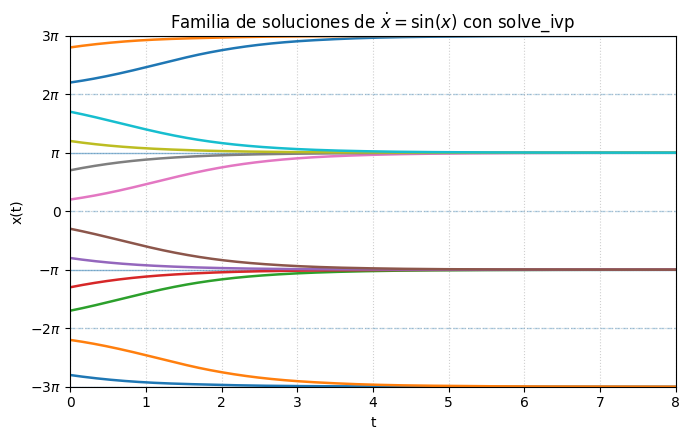

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

# ============================================================
# Definir la función para resolver con solve_ivp
# ============================================================
def solve_with_solve_ivp(f_sym, t0, tmax, N_t, x0_list, method="RK45"):
    """
    Resuelve dx/dt = f(x) con solve_ivp para una lista de condiciones iniciales.
    """
    # Convertir a función numérica (numpy)
    f_num = sp.lambdify(sp.symbols('x'), f_sym, 'numpy')

    # Definir función en forma compatible con solve_ivp
    def rhs(t, y):
        return f_num(y)

    # Tiempo
    ts = np.linspace(t0, tmax, N_t)

    # Resolver para cada condición inicial
    soluciones = []
    for x0 in x0_list:
        sol = solve_ivp(rhs, (t0, tmax), [x0], t_eval=ts, method=method)
        soluciones.append(sol.y[0])
    return ts, soluciones

# ============================================================
# Script principal para Figura 2.1.3 con solve_ivp
# ============================================================

# Definir el campo f(x) = sin(x)
x = sp.symbols('x')
f_sym = sp.sin(x)

# Parámetros de integración
t0, tmax, N_t = 0.0, 8.0, 600
pis = np.pi
x0_list = [-2.8*pis, -2.2*pis, -1.7*pis, -1.3*pis, -0.8*pis, -0.3*pis,
           0.2*pis, 0.7*pis, 1.2*pis, 1.7*pis, 2.2*pis, 2.8*pis]

# Resolver
ts, soluciones = solve_with_solve_ivp(f_sym, t0, tmax, N_t, x0_list, method="RK45")

# Graficar
plt.figure(figsize=(7,4.5))

# Líneas horizontales en puntos fijos
for k in range(-4, 5):
    y = k*np.pi
    if k % 2 != 0:  # estables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='solid', alpha=0.5)
    else:           # inestables
        plt.hlines(y, t0, tmax, linewidth=1.0, linestyles='dashed', alpha=0.3)

# Trayectorias
for sol in soluciones:
    plt.plot(ts, sol, linewidth=1.8)

# Formato
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Familia de soluciones de $\\dot{x} = \\sin(x)$ con solve_ivp")
plt.xlim(t0, tmax)
plt.ylim(-3*np.pi, 3*np.pi)
plt.yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.show()


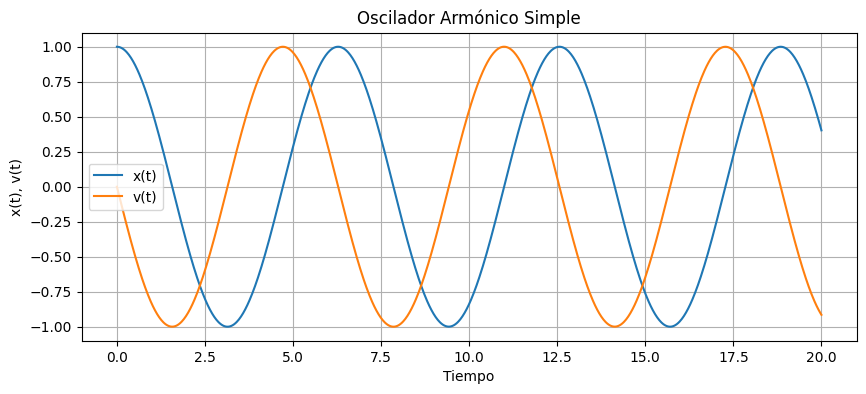

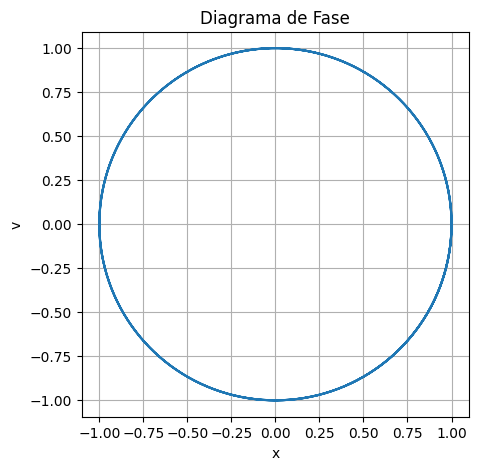

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0      # masa
k = 1.0      # constante del resorte
omega = np.sqrt(k / m)

# Definimos el sistema de ecuaciones diferenciales
def sho(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]

# Condiciones iniciales
x0 = 1.0   # desplazamiento inicial
v0 = 0.0   # velocidad inicial

# Intervalo de tiempo
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Resolver ODE
sol = solve_ivp(sho, t_span, [x0, v0], t_eval=t_eval)

# Graficar x(t)
plt.figure(figsize=(10,4))
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='v(t)')
plt.xlabel('Tiempo')
plt.ylabel('x(t), v(t)')
plt.title('Oscilador Armónico Simple')
plt.legend()
plt.grid()
plt.show()

# Diagrama de fase (x vs v)
plt.figure(figsize=(5,5))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel('v')
plt.title('Diagrama de Fase')
plt.grid()
plt.axis('equal')
plt.show()
